In [1]:
import matplotlib.pyplot as plt
import numpy as np
import nmrglue as ng

%matplotlib inline

In [2]:
data_dir='/Users/yunyao_1/Documents/Experiments_Data/data/CdSe_DNP/Old-DNP-nmr/71'

In [3]:
time_file='/Users/yunyao_1/Documents/Experiments_Data/data/CdSe_DNP/Old-DNP-nmr/71/vdlist'
time=np.loadtxt(time_file)
time

array([1.0e-03, 1.0e-02, 1.0e-01, 2.5e-01, 5.0e-01, 1.0e+00, 2.0e+00,
       4.0e+00, 8.0e+00, 1.2e+01, 1.6e+01, 3.2e+01])

In [4]:
#read in data
dic, data=ng.bruker.read_pdata(data_dir+'/pdata/1')
udic=ng.bruker.guess_udic(dic,data)
uc=ng.fileiobase.uc_from_udic(udic)
ppm_scale=uc.ppm_scale()

In [5]:
print(data.shape)

(16, 4096)


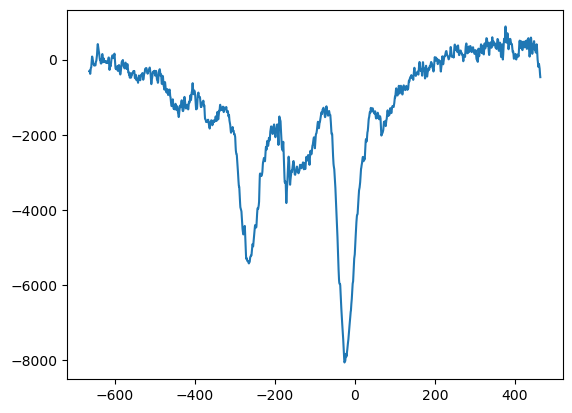

In [6]:
plt.plot(ppm_scale,data[0])

In [7]:
peak_1=[]
peak_2=[]
for i in range(16):
    peak_1.append(data[i][uc(-21.3,'ppm')])
    peak_2.append(data[i][uc(-263.3,'ppm')])


In [8]:
peak_1_norm=np.array(peak_1/max(peak_1))
peak_2_norm=np.array(peak_2/max(peak_2))

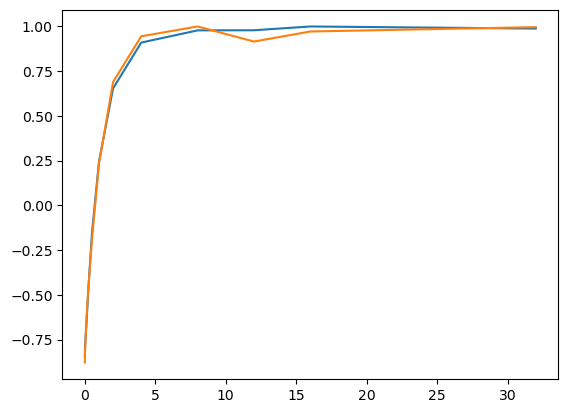

In [9]:
plt.plot(time,peak_1_norm[:12])
plt.plot(time,peak_2_norm[:12])

Optimized parameter a: 0.9738811059616337


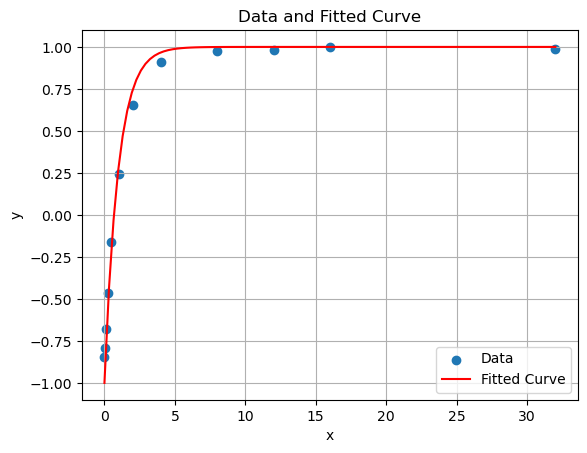

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define the function you want to fit
def my_function(x, a):
    return 1 - 2 * np.exp(- x/a)

# Generate some example data (replace this with your actual data)
x_data = time
y_data = peak_1_norm[:12]

# Fit the data to the function using curve_fit
params, covariance = curve_fit(my_function, x_data, y_data)

# Extract the optimized parameter 'a' from the fit
a_optimized = params[0]

# Create a range of x values for the fitted curve
x_fit = np.linspace(min(x_data), max(x_data), 100)

# Calculate the corresponding y values for the fitted curve
y_fit = my_function(x_fit, a_optimized)

# Plot the original data and the fitted curve
plt.scatter(x_data, y_data, label='Data')
plt.plot(x_fit, y_fit, 'r-', label='Fitted Curve')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Data and Fitted Curve')
plt.grid(True)
#plt.show()
plt.savefig('113Cd_t1_350nm_peakm21.3.pdf')
# Display the optimized parameter 'a'
print(f'Optimized parameter a: {a_optimized}')


Optimized parameter a: 0.9737042044342129


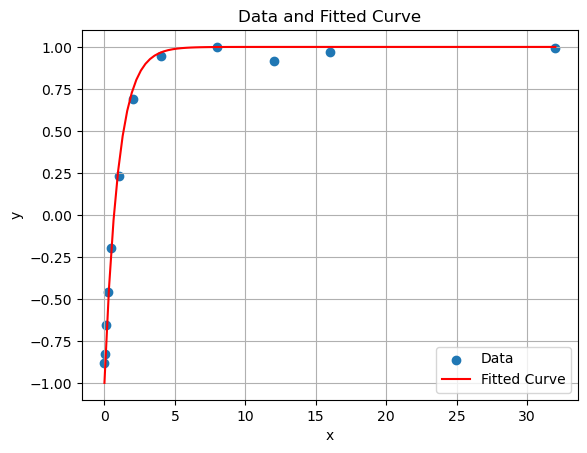

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define the function you want to fit
def my_function(x, a):
    return 1 - 2 * np.exp(- x/a)

# Generate some example data (replace this with your actual data)
x_data = time
y_data = peak_2_norm[:12]

# Fit the data to the function using curve_fit
params, covariance = curve_fit(my_function, x_data, y_data)

# Extract the optimized parameter 'a' from the fit
a_optimized = params[0]

# Create a range of x values for the fitted curve
x_fit = np.linspace(min(x_data), max(x_data), 100)

# Calculate the corresponding y values for the fitted curve
y_fit = my_function(x_fit, a_optimized)

# Plot the original data and the fitted curve
plt.scatter(x_data, y_data, label='Data')
plt.plot(x_fit, y_fit, 'r-', label='Fitted Curve')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Data and Fitted Curve')
plt.grid(True)
#plt.show()
plt.savefig('113Cd_t1_350nm_peakm263.3.pdf')

# Display the optimized parameter 'a'
print(f'Optimized parameter a: {a_optimized}')